<a href="https://colab.research.google.com/github/phongilm20/Machine-Learning/blob/Study/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Gradient Descent

In [ ]:
import numpy as np

In [ ]:
def grad(x):
  return 2*x + 5 * np.cos(x)

def cost(x):
  return x ** 2  + 5 * np.sin(x)

def myGD1 (x0, eta):
  x = [x0]
  for it in range(100):
    x_new = x[-1] - eta * grad(x[-1])
    if abs(grad(x_new)) < 1e-1:
      break

    x.append(x_new)
  return (x, it)


In [ ]:
(x1, it1) = myGD1(-5, 0.1)
(x2, it2) = myGD1(5, 0.1)

print(x1[-1], cost(x1[-1]), it1)
print(x2[-1], cost(x2[-1]), it2)

-1.1398126662660861 -3.2436033389938617 6
-1.079641732011138 -3.2433181726058273 24


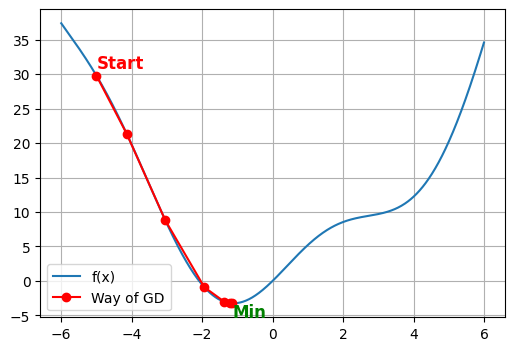

In [ ]:
# Plot it
import matplotlib.pyplot as plt

(x_history, it) = myGD1(-5,0.1)

x_axis = np.linspace(-6 , 6 , 1000)
y_axis = cost(x_axis)

plt.figure(figsize=(6,4))

plt.plot(x_axis, y_axis, label = 'f(x)')

x_history_arr = np.array(x_history)
y_history_arr = cost(x_history_arr)

plt.text(x_history[0], cost(x_history[0]) + 1, 'Start', color='red', fontsize=12, fontweight='bold')
plt.text(x_history[-1], cost(x_history[-1]) - 2, 'Min', color='green', fontsize=12, fontweight='bold')

plt.plot(x_history_arr, y_history_arr, '-ro', label= 'Way of GD')
plt.grid(True)
plt.legend()
plt.show()


## 2. Gradient descent more

In [ ]:
# Generate data with 1000 data points
from sklearn.linear_model import LinearRegression
X = np.random.rand(1000)
y = 4 + 3 * X + np.random.randn(1000)
y = y.reshape(-1,1)

model = LinearRegression()
model.fit(X.reshape(-1,1), y)
w,b = model.coef_[0][0], model.intercept_[0]
sol_sklearn = np.array([b,w])
print(sol_sklearn)

[4.01552896 2.93509671]


In [ ]:
def grad(w):
  N = Xbar.shape[0]
  return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
  N = Xbar.shape[0]
  return 0.5/N*np.linalg.norm(y - Xbar.dot(w))

In [ ]:
def myGD(w_init, grad, eta):
  w = [w_init]
  for it in range(100):
    w_new = w[-1] - eta * grad(w[-1])
    if np.linalg.norm(grad(w_new)) / len(w_new) < 1e-3:
      break
    w.append(w_new)
  return(w,it)

In [ ]:
one = np.ones((X.shape[0],1)) # add x0 = 1
Xbar = np.concatenate((one, X.reshape(-1,1)), axis = 1 )
w_init = np.array([[2],[1]])
(w1, it1) = myGD(w_init, grad, 1)
print(w1[-1].T, it1)
print(cost(w1[-1]))

[[4.02994027 2.90791225]] 47
0.015658149273082008


## 3. Momentum Gradient Descent

In [ ]:
def GD_momentum(grad, theta_init, eta, gamma):
  theta = [theta_init]
  v_old = np.zeros_like(theta_init)
  for i in range (100):
    v_new = gamma * v_old + eta * grad(theta[-1])
    theta_new = theta[-1] - v_new
    if np.linalg.norm(grad(theta_new)) / len(theta_new) < 1e-3:
      break
    theta.append(theta_new)
    v_old = v_new
  return theta

In [ ]:
theta = GD_momentum(grad, w_init, 0.1, 0.9)
theta[-1]


array([[4.02796297],
       [2.94347603]])

In [ ]:
print(cost(theta[-1]))

0.01565989156926524


## 4. Nesterov Accelerated gradient

In [ ]:
def GD_NAG (grad, theta_init, eta, gamma):
  theta = [theta_init]
  v = [np.zeros_like(theta_init)]
  for i in range(100):
    v_new = gamma * v[-1] + eta * grad(theta[-1] - gamma * v[-1])
    theta_new = theta[-1] - v_new
    if np.linalg.norm(grad(theta_new)) / np.array(theta_new).size < 1e-3:
      break
    theta.append(theta_new)
    v.append(v_new)
  return theta

In [ ]:
theta = GD_NAG(grad, w_init, 0.1, 0.9)
theta[-1]

array([[4.00328675],
       [2.95987187]])

In [ ]:
print(cost(theta[-1]))

0.015658058633095585
